**TASK 4**

**Step 1: Import Required Libraries**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set Plot Style
sns.set(style="whitegrid", palette="husl")

**Step 2: Load and Inspect the Dataset**

In [ ]:
# Load Dataset
data = pd.read_csv('/content/advertising.csv')

# Display the First Few Rows
print("Dataset Overview:")
print(data.head())

# Display Dataset Information
print("\nDataset Info:")
print(data.info())

# Check for Missing Values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Missing Values:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


**Step 3: Exploratory Data Analysis (EDA)**

**3.1 Correlation Matrix**

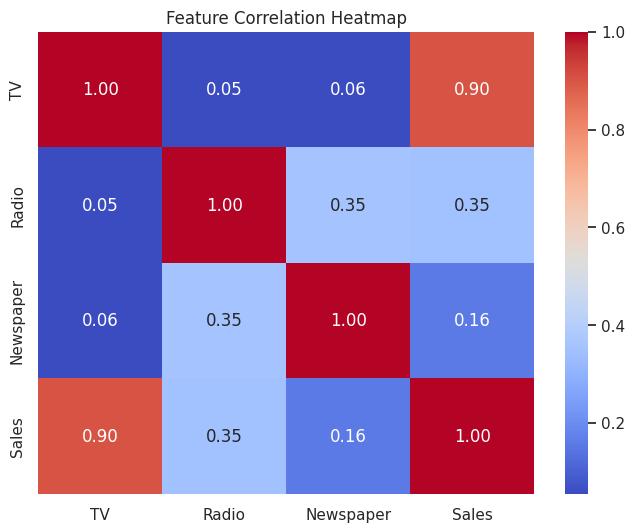

In [ ]:
# Compute Correlation
correlation = data.corr()

# Heatmap of Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

**3.2 Pair Plot**

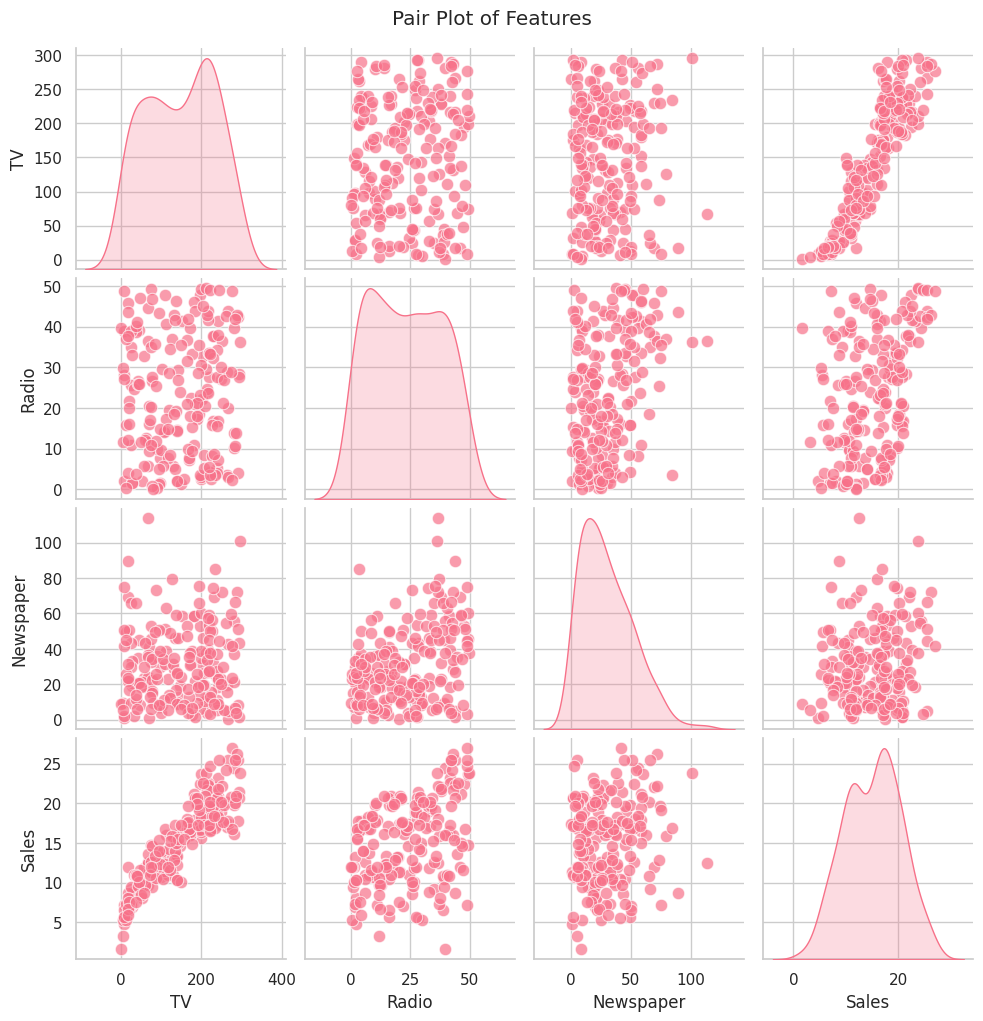

In [ ]:
# Pair Plot
sns.pairplot(data, diag_kind="kde", plot_kws={'alpha':0.7, 's':80}, height=2.5)
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

**3.3 Distribution of Sales**

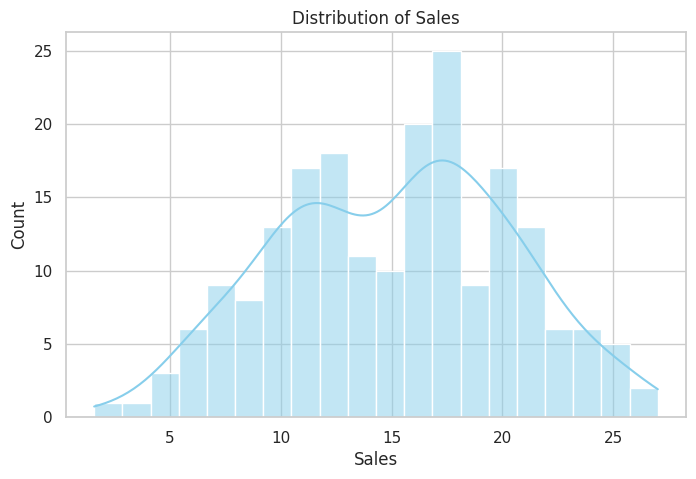

In [ ]:
# Sales Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Sales'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.show()

**Step 4: Split Dataset into Train and Test Sets**

In [ ]:
# Features and Target
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed:")
print(f"Training Samples: {len(X_train)}, Testing Samples: {len(X_test)}")

Train-Test Split Completed:
Training Samples: 160, Testing Samples: 40


**Step 5: Train the Linear Regression Model**

In [ ]:
# Initialize and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Display Model Coefficients
print("Model Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {list(zip(X.columns, model.coef_))}")

Model Coefficients:
Intercept: 4.714126402214127
Coefficients: [('TV', 0.05450927083721978), ('Radio', 0.10094536239295579), ('Newspaper', 0.0043366468220340446)]


**Step 6: Model Evaluation**

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Model Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Evaluation:\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Model Evaluation:
Mean Squared Error: 2.91
R-squared: 0.91


**Step 7: Visualize Predictions**

**7.1 Actual vs Predicted Sales**

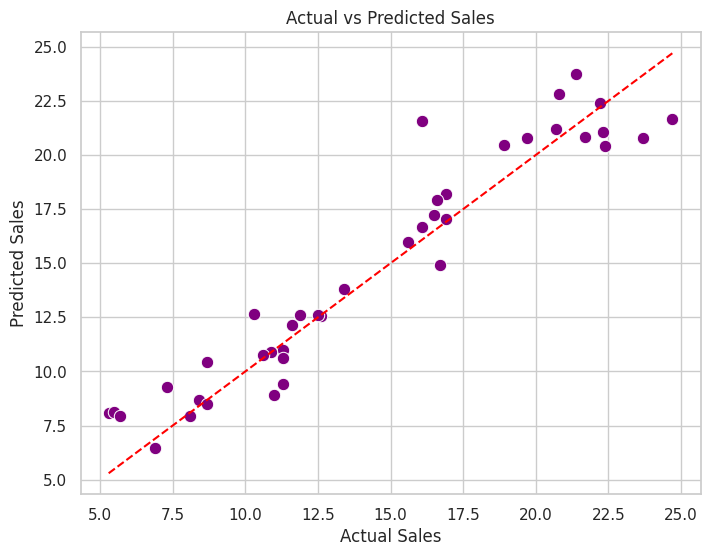

In [ ]:
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple', s=80)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

**7.2 Residual Plot**

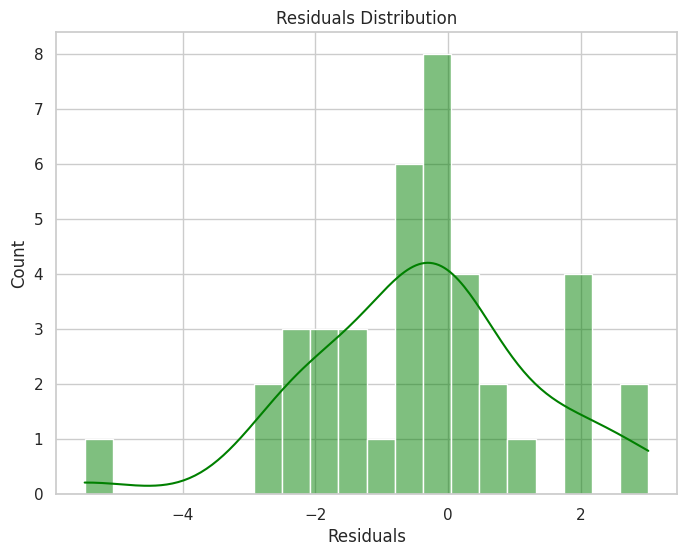

In [ ]:
# Residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color='green')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()

**Step 8: Feature Importance Visualization**

<ipython-input-15-3dd780ca949a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


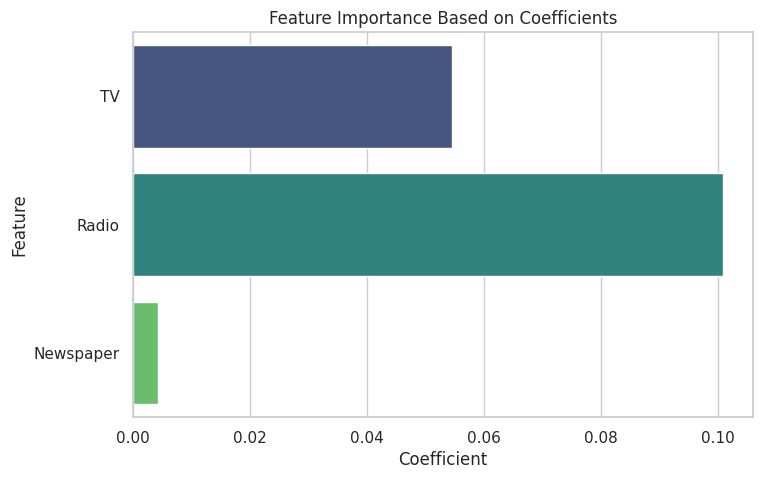

In [ ]:
# Feature Importance (Coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title("Feature Importance Based on Coefficients")
plt.show()